# telecom customer churn prediction

# Dataset
- CustomerID: A unique ID that identifies each customer.
- Gender: The customer’s gender: Male, Female
- Age: The customer’s current age, in years, at the time the fiscal quarter ended.
- Senior Citizen: Indicates if the customer is 65 or older: Yes, No
- Married (Partner): Indicates if the customer is married: Yes, No
- Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
- Number of Dependents: Indicates the number of dependents that live with the customer.
- Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No
- Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No
- Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.
- Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No
  Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No
- Device Protection Plan: Indicates if the customer subscribes to an additional device protection plan for their Internet -equipment provided by the company: Yes, No
- Premium Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No
- Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.
- Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.
- Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.
- Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No
- Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
- Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.
- Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.
- Tenure: Indicates the total amount of months that the customer has been with the company.
- Churn: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

# import important libraries

In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataFrame = pd.read_csv("H:\\Data Science Repository\\telecom customer retention\\WA_Fn-UseC_-Telco-Customer-Churn.csv")
dataFrame

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [176]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data Pre-processing Phase

# Dealing with Missing or duplicated values
* there is no missing values or ("NULLS")
* but after for data investigation found that :
* col. TotalCharges has 11 empty space
* empty cells could miss lead the model
* so for this case the empty space will be replaced with the MonthlyCharges

In [177]:
#dataFrame.isnull()
#dataFrame.isna().any()
print("Missing Values overview : ") 
print(dataFrame.isnull().sum().sort_values(ascending=False))
print("-----------------------")
print("duplicated values overview : ", dataFrame.duplicated().sum())

Missing Values overview : 
customerID          0
DeviceProtection    0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
OnlineBackup        0
gender              0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
SeniorCitizen       0
Churn               0
dtype: int64
-----------------------
duplicated values overview :  0


In [178]:
# the empty space will be replaced with the MonthlyCharges
dataFrame.loc[dataFrame['TotalCharges'] == ' ','TotalCharges'] = dataFrame['MonthlyCharges']
dataFrame['TotalCharges'] = dataFrame['TotalCharges'].astype(float) #change col dtype from object to float

In [179]:
# overview on TotalChrages after assigning missing values
dataFrame.query('tenure == 0')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,52.55,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,20.25,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,80.85,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,25.75,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,56.05,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,19.85,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,25.35,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,20.00,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,19.70,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,73.35,No


# Handling outliers
- there are two types of identyfing outliers
- Quaratile
- Percentile

In [180]:
#Split numerical from categorical data
num_data = dataFrame.select_dtypes(['float','int']).drop('SeniorCitizen', axis = 1)
cat_data = dataFrame.drop(num_data, axis=1).drop('customerID', axis = 1)

In [181]:
num_data

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [182]:
cat_data

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


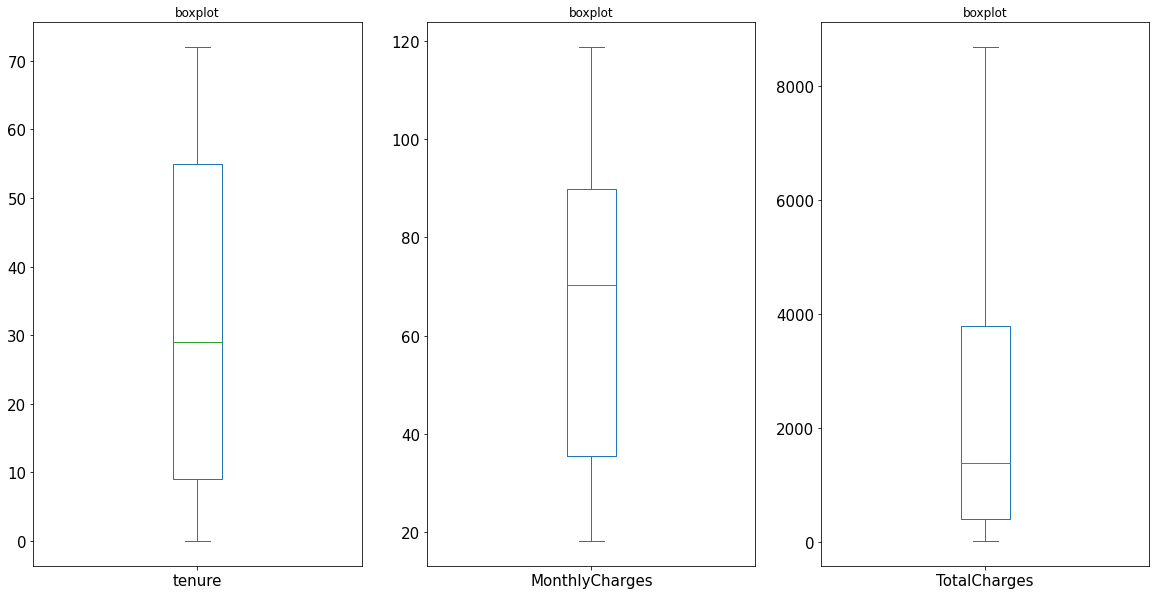

In [183]:
n = 0
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(5,5))
for i in num_data:
    num_data[i].plot(kind='box', title='boxplot', figsize=(20,10), fontsize=15, ax = axes[n])
    n = n + 1

In [184]:
# Calculate first, third Quaratile & Inter Quaratile Range
Q1 = num_data.quantile(0.25)
Q3 = num_data.quantile(0.75)
IQR = Q3 - Q1
IQR

tenure              46.00
MonthlyCharges      54.35
TotalCharges      3388.05
dtype: float64

In [185]:
print("lets see the data shape before removing outliers",num_data.shape)

lets see the data shape before removing outliers (7043, 3)


In [186]:
# eleminate the outliers by calculating the lower and uppwer boundries
num_data = num_data[~((num_data < (Q1 - 1.5 * IQR)) | (num_data > (Q3 + 1.5 * IQR)))]

In [187]:
print("lets see the data shape after removing outliers",num_data.shape)
print("Oultiers have not been found")

lets see the data shape after removing outliers (7043, 3)
Oultiers have not been found


# Dealing with imbalancing data (imp)
* there are two techniques to deal with imbalancing data
* Random OverSampling
* Random UnderSampling

Imbalancing data exist
-----------------------
No     5174
Yes    1869
Name: Churn, dtype: int64
-----------------------


<AxesSubplot: ylabel='Churn'>

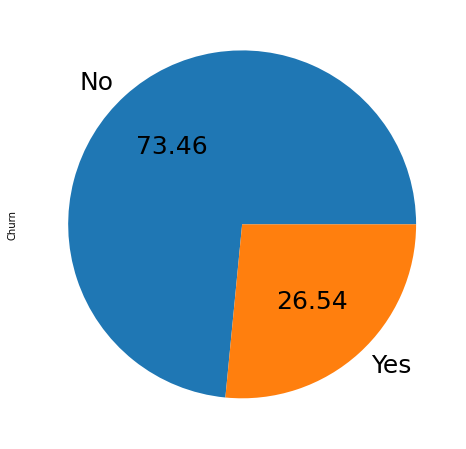

In [188]:
print("Imbalancing data exist")
print("-----------------------")
print(dataFrame['Churn'].value_counts())
print("-----------------------")
dataFrame['Churn'].value_counts().plot.pie(autopct='%.2f',figsize=(8,8),fontsize=25)

In [189]:
x = dataFrame.drop('Churn', axis=1)
y = dataFrame['Churn']

* Random OverSampling technique will be used which is mean :
- "not majority" = resample all classes but the majority class
* the number of minority class will be increased to be close to the majority class
* hence the balanced data will be exist

In [190]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy="not majority")
x_res, y_res = ros.fit_resample(x, y)

balancing data exist
-----------------------
No     5174
Yes    5174
Name: Churn, dtype: int64
-----------------------


<AxesSubplot: ylabel='Churn'>

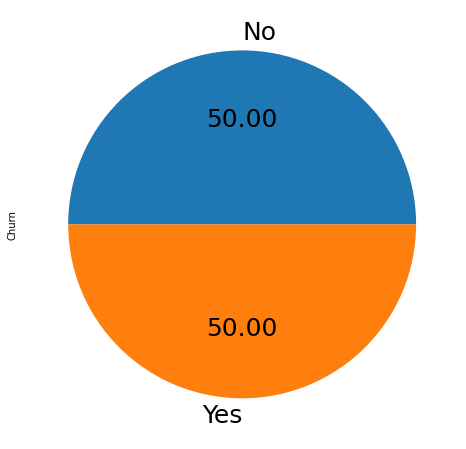

In [191]:
print("balancing data exist")
print("-----------------------")
print(y_res.value_counts())
print("-----------------------")
y_res.value_counts().plot.pie(autopct='%.2f',figsize=(8,8),fontsize=25)

# Encoding Categorical to Numerical variables
- one hot encoder pd.get_dummies(dataFram, columns=[], prefix=' ')
- dummies function pd.get_dummies(dataFram, columns=[], drop_first=True, prefix=' ') 
- label encoder
- --
- limit the columns ("Other") :
- create columns for the most common values dataFrame['colname'].value_counts()
- store the non common values in a list mask = dataFrame['colname'].isin(counts[counts < num].index)
- replace that categories (non common) that occure less than (num) dataFrame['colname'][mask] = 'Other'

- we have two types of categorical variables
- 1) the binary vairables (labelencoder)
- ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
- 2) the non binary vairables (one-hot encoding)
- ['MultipleLines' ,'InternetService' ,'OnlineSecurity' ,'OnlineBackup' ,'DeviceProtection' ,'TechSupport' ,'StreamingTV' ,'Contract' ,'PaymentMethod']

In [192]:
# if we goona use just label encoder not other types like ont-hot encoding
"""
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for col in dataFrame.columns:
    if dataFrame[col].dtype=='object':
        dataFrame[col]=l.fit_transform(dataFrame[col])
"""

"\nfrom sklearn.preprocessing import LabelEncoder\nl=LabelEncoder()\nfor col in dataFrame.columns:\n    if dataFrame[col].dtype=='object':\n        dataFrame[col]=l.fit_transform(dataFrame[col])\n"

In [193]:
binary = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
not_binary = ['MultipleLines' ,'InternetService' ,'OnlineSecurity' ,'OnlineBackup' ,'DeviceProtection' ,'TechSupport' ,
              'StreamingTV' , 'StreamingMovies','Contract' ,'PaymentMethod']

In [194]:
binary = cat_data.drop(not_binary, axis=1)
not_binary = cat_data.drop(binary, axis=1)

In [195]:
# LabelEncoder
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
for i in binary:
    binary[i] = le.fit_transform(binary[i])

In [196]:
binary

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,0,0,1,0,0,1,0
1,1,0,0,0,1,0,0
2,1,0,0,0,1,1,1
3,1,0,0,0,0,0,0
4,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...
7038,1,0,1,1,1,1,0
7039,0,0,1,1,1,1,0
7040,0,0,1,1,0,1,0
7041,1,1,1,0,1,1,1


In [197]:
# dummies
not_binary = pd.get_dummies(not_binary, columns=['MultipleLines' ,'InternetService' ,'OnlineSecurity' ,
                                                 'OnlineBackup' ,'DeviceProtection' ,'TechSupport' ,
              'StreamingTV' , 'StreamingMovies','Contract' ,'PaymentMethod'],
                            drop_first=True, prefix=['ML','IS','OS','OB','DP','TS','STV','SM','C','PM'])

# one-hot encoding
"""
not_binary = pd.get_dummies(not_binary, columns=['MultipleLines' ,'InternetService' ,'OnlineSecurity' ,
                                                 'OnlineBackup' ,'DeviceProtection' ,'TechSupport' ,
              'StreamingTV' , 'StreamingMovies','Contract' ,'PaymentMethod'],
                            prefix=['ML','IS','OS','OB','DP','TS','STV','SM','C','PM'])
not_binary
"""

"\nnot_binary = pd.get_dummies(not_binary, columns=['MultipleLines' ,'InternetService' ,'OnlineSecurity' ,\n                                                 'OnlineBackup' ,'DeviceProtection' ,'TechSupport' ,\n              'StreamingTV' , 'StreamingMovies','Contract' ,'PaymentMethod'],\n                            prefix=['ML','IS','OS','OB','DP','TS','STV','SM','C','PM'])\nnot_binary\n"

In [198]:
not_binary

,ML_No phone service,ML_Yes,IS_Fiber optic,IS_No,OS_No internet service,OS_Yes,OB_No internet service,OB_Yes,DP_No internet service,DP_Yes,...,TS_Yes,STV_No internet service,STV_Yes,SM_No internet service,SM_Yes,C_One year,C_Two year,PM_Credit card (automatic),PM_Electronic check,PM_Mailed check
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,0,0,0,1,0,0,0,1,...,1,0,1,0,1,1,0,0,0,1
7039,0,1,1,0,0,0,0,1,0,1,...,0,0,1,0,1,1,0,1,0,0
7040,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7041,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [199]:
# merge back the binary cols with non binary cols
cat_data = pd.concat([not_binary, binary], axis=1)
# merge categorical & numerical data back to the original dataFrame after pre-processing
dataFrame = pd.concat([num_data, cat_data], axis=1)

In [200]:
dataFrame

,tenure,MonthlyCharges,TotalCharges,ML_No phone service,ML_Yes,IS_Fiber optic,IS_No,OS_No internet service,OS_Yes,OB_No internet service,...,PM_Credit card (automatic),PM_Electronic check,PM_Mailed check,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,1,29.85,29.85,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,1,0,0
2,2,53.85,108.15,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,1,1,1
3,45,42.30,1840.75,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,2,70.70,151.65,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,0,1,0,0,0,1,0,...,0,0,1,1,0,1,1,1,1,0
7039,72,103.20,7362.90,0,1,1,0,0,0,0,...,1,0,0,0,0,1,1,1,1,0
7040,11,29.60,346.45,1,0,0,0,0,1,0,...,0,1,0,0,0,1,1,0,1,0
7041,4,74.40,306.60,0,1,1,0,0,0,0,...,0,0,1,1,1,1,0,1,1,1


# Feature Selection (correlation matrix)

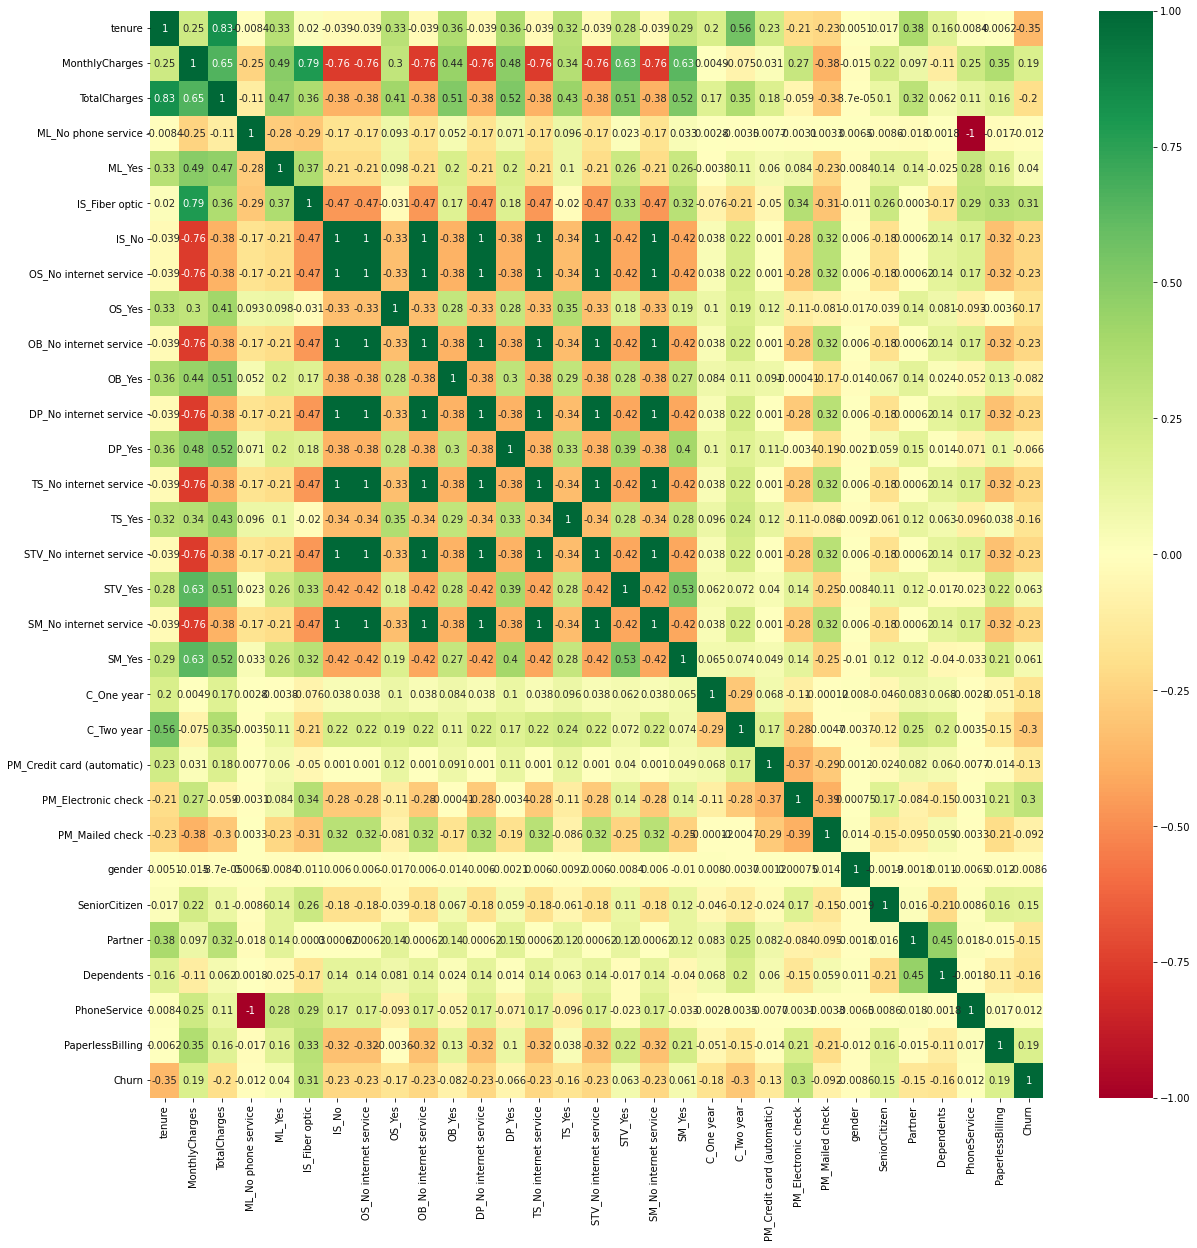

In [201]:
# correlation matrix shows how the atrributes are correlated to country destination
corrmat = dataFrame.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(dataFrame[top_corr_features].corr(), annot=True, cmap="RdYlGn")

- It is a huge matrix with too many features. We will check the correlation only with respect to Churn.

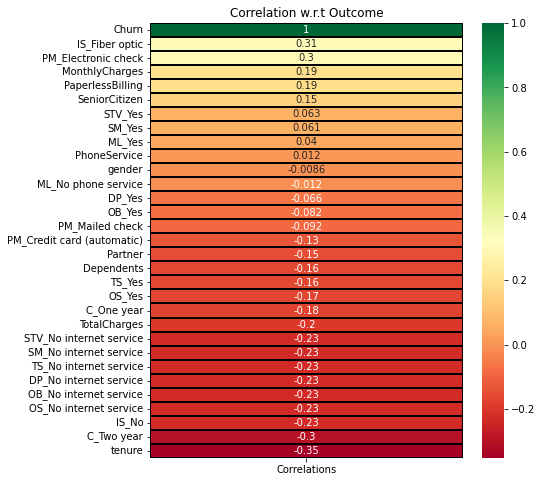

In [202]:
corr = dataFrame.corrwith(dataFrame['Churn']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (7,8))
sns.heatmap(corr,annot = True,cmap = 'RdYlGn',linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t Outcome');

- MulipleLines, PhoneService, gender, StreamingTV, StreamingMovies and InternetService does not display any kind of correlation. We drop the features with correlation coefficient between (-0.1,0.1).
- Remaining features either display a significant positive or negative correlation.

# Feature Scaling
- Machine learning model does not understand the units of the values of the features. It treats the input just as a simple number but does not understand the true meaning of that value. Thus, it becomes necessary to scale the data.
- Eg : Age = Years; FastingBS = mg / dl; Charges = Currency

- We have 2 options for data scaling : 1) Normalization 2) Standardization. As most of the algorithms assume the data to be normally (Gaussian) distributed, Normalization is done for features whose data does not display normal distribution and standardization is carried out for features that are normally distributed where their values are huge or very small as compared to other features.
- Normalization : tenure, MonthlyCharges and TotalCharges features are normalized as they displayed a right skewed and bimodal data distribution.
- Standardization : None of the features are standardized for the above data.

In [203]:
# the numeric values that will be scaled
dataFrame.iloc[:,0:3]

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [204]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

dataFrame['tenure'] = mms.fit_transform(dataFrame[['tenure']])
dataFrame['MonthlyCharges'] = mms.fit_transform(dataFrame[['MonthlyCharges']])
dataFrame['TotalCharges'] = mms.fit_transform(dataFrame[['TotalCharges']])
dataFrame.iloc[:,0:3]

,tenure,MonthlyCharges,TotalCharges
0,0.013889,0.115423,0.001275
1,0.472222,0.385075,0.215867
2,0.027778,0.354229,0.010310
3,0.625000,0.239303,0.210241
4,0.027778,0.521891,0.015330
...,...,...,...
7038,0.333333,0.662189,0.227521
7039,1.000000,0.845274,0.847461
7040,0.152778,0.112935,0.037809
7041,0.055556,0.558706,0.033210


# Model Build

In [205]:
X,y = dataFrame.drop('Churn', axis=1), dataFrame['Churn']

In [206]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.75, stratify=y)

In [207]:
model = XGBClassifier()

model.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [208]:
model.fit(train_X,train_y).get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_threshold': 64,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 6,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

# Model Evaluate

In [209]:
y_predict = model.predict(test_X)

In [210]:
y_predict

array([1, 0, 0, ..., 0, 1, 1])

In [211]:
pred_y_df_2 = pd.DataFrame({'Actual' : test_y, 'predicted' : y_predict, "Difference" :y_predict- test_y})
pred_y_df_2[0:20]

,Actual,predicted,Difference
4940,0,1,1
4584,0,0,0
5062,1,0,-1
1302,0,0,0
1982,0,0,0
5510,0,1,1
306,1,1,0
4438,0,0,0
2574,1,1,0
6581,0,0,0


In [212]:
#  prediction Summary by species
print(classification_report(test_y, y_predict))
acc = accuracy_score(test_y, y_predict)
print("the accuracy of the xgboost is = ", round(acc,308)*100, "%")

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1294
           1       0.60      0.51      0.55       467

    accuracy                           0.78      1761
   macro avg       0.72      0.69      0.70      1761
weighted avg       0.77      0.78      0.77      1761

the accuracy of the xgboost is =  77.96706416808632 %


# Model Hyper-Paramaters Tuning

# Grid Search 

In [213]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV

In [214]:
param_grid = { 
    "colsample_bytree": [ 0.3, 0.5 , 0.8 ],
    "reg_alpha": [0, 0.5, 1, 5],
    "reg_lambda": [0, 0.5, 1, 5]
    }
#scoring = ['recall']
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

In [215]:
grid_search = GridSearchCV(estimator=model, 
                           param_grid=param_grid, 
                           scoring='accuracy', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)
grid_result = grid_search.fit(train_X, train_y)
grid_result
print(f'The best score is {grid_result.best_score_:.4f}')
#print('The best score standard deviation is', round(grid_result.cv_results_['std_test_recall'][grid_result.best_index_], 4))
print(f'The best hyperparameters are {grid_result.best_params_}')

The best score is 0.7999
The best hyperparameters are {'colsample_bytree': 0.5, 'reg_alpha': 5, 'reg_lambda': 0}


# Random Search

In [216]:
# Define the search space
param_grid = { 
    # Learning rate shrinks the weights to make the boosting process more conservative
    "learning_rate": [0.0001,0.001, 0.01, 0.1, 1] ,
    # Maximum depth of the tree, increasing it increases the model complexity.
    "max_depth": range(3,21,3),
    # Gamma specifies the minimum loss reduction required to make a split.
    "gamma": [i/10.0 for i in range(0,5)],
    # Percentage of columns to be randomly samples for each tree.
    "colsample_bytree": [i/10.0 for i in range(3,10)],
    # reg_alpha provides l1 regularization to the weight, higher values result in more conservative models
    "reg_alpha": [1e-5, 1e-2, 0.1, 1, 10, 100],
    # reg_lambda provides l2 regularization to the weight, higher values result in more conservative models
    "reg_lambda": [1e-5, 1e-2, 0.1, 1, 10, 100]}
# Set up score
#scoring = ['recall']
# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

In [217]:
# Define random search
# n_iter, the number of parameter combinations sampled. So we are randomly testing 48 combinations for this example.
random_search = RandomizedSearchCV(estimator=model, 
                           param_distributions=param_grid, 
                           n_iter=48,
                           scoring='accuracy', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)
# Fit grid search
random_result = random_search.fit(train_X, train_y)
# Print grid search summary
random_result
# Print the best score and the corresponding hyperparameters
print(f'The best score is {random_result.best_score_:.4f}')
#print('The best score standard deviation is', round(random_result.cv_results_['std_test_recall'][random_result.best_index_], 4))
print(f'The best hyperparameters are {random_result.best_params_}')

The best score is 0.8001
The best hyperparameters are {'reg_lambda': 1, 'reg_alpha': 10, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.9}


# Bayesian Optimization
- we will apply Hyperopt Bayesian optimization on XGBoost hyperparameter tuning. According to the documentation on Hyperopt github page : https://github.com/hyperopt/hyperopt/wiki/FMin , there are four key elements for Hyperopt:

* the space over which to search
* the objective function to minimize
* the database in which to store all the point evaluations of the search
* the search algorithm to use
- For the search space, the same space as the random search is used for the Hyperopt Bayesian optimization.

In [218]:
from hyperopt import tpe, STATUS_OK, Trials, hp, fmin, STATUS_OK, space_eval
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix

# identify search space (combinations)

In [219]:
# Space
space = {
    'learning_rate': hp.choice('learning_rate', [0.0001,0.001, 0.01, 0.1, 1]),
    'max_depth' : hp.choice('max_depth', range(3,21,3)),
    'gamma' : hp.choice('gamma', [i/10.0 for i in range(0,5)]),
    'colsample_bytree' : hp.choice('colsample_bytree', [i/10.0 for i in range(3,10)]),     
    'reg_alpha' : hp.choice('reg_alpha', [1e-5, 1e-2, 0.1, 1, 10, 100]), 
    'reg_lambda' : hp.choice('reg_lambda', [1e-5, 1e-2, 0.1, 1, 10, 100])
}


# calculate the k fold
- Set up the k-fold cross-validation
- StratifiedKFold is used for the cross-validation.
- It helps us keep the class ratio in the folds the same as the training dataset.
- n_splits=3 means we are doing 3-fold cross-validation.means that the training dataset is split into 3 folds.
- This is because our dataset is small. For a larger dataset, usually 5 or 10 folds are used.
- shuffle=True means the data are shuffled before splitting. means that the dataset will be shuffled before splitting into folds
- Note that the samples within each split will not be shuffled.
- random_state=0 make the split reproducible.

In [220]:
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

# Objective function

In [221]:
# Objective function
def objective(params):
    
    model = XGBClassifier(seed=0, **params)
    score = cross_val_score(estimator=model, 
                            X=train_X, 
                            y=train_y, 
                            cv=kfold, 
                            scoring='accuracy', 
                            n_jobs=-1).mean()
    # Loss is negative score
    loss = - score
    # Dictionary with information for evaluation
    return {'loss': loss, 'params': params, 'status': STATUS_OK}

# Optimize
- fmin is the function to search the best hyperparameters with the smallest loss value.
- fn takes in the objective function.
- space is for the search space of the hyperparameters.
- algo is for the type of search algorithms. Hyperopt currently has three algorithms, random search, Tree of Parzen Estimators (TPE), and adaptive TPE. We are using TPE as the search algorithm.
- max_evals specifies the maximum number of evaluations.
- trials stores the information for the evaluations.

In [222]:
best = fmin(fn = objective, space = space, algo = tpe.suggest, max_evals = 48, trials = Trials())

100%|███████████████████████████████████████████████| 48/48 [00:46<00:00,  1.03trial/s, best loss: -0.7993183538967185]


# the best parameters

In [223]:
# Print the values of the best parameters
print("the indexes of the best parameters :")
print(best)
print("---------------------------------")
print("the values of the best parameters :")
print(space_eval(space, best))

the indexes of the best parameters :
{'colsample_bytree': 3, 'gamma': 3, 'learning_rate': 3, 'max_depth': 0, 'reg_alpha': 0, 'reg_lambda': 5}
---------------------------------
the values of the best parameters :
{'colsample_bytree': 0.6, 'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'reg_alpha': 1e-05, 'reg_lambda': 100}


# Train the model using the best parameters

In [224]:
# Train model using the best parameters
xgboost_bo = XGBClassifier(seed=0, 
                           colsample_bytree=space_eval(space, best)['colsample_bytree'], 
                           gamma=space_eval(space, best)['gamma'], 
                           learning_rate=space_eval(space, best)['learning_rate'], 
                           max_depth=space_eval(space, best)['max_depth'], 
                           reg_alpha=space_eval(space, best)['reg_alpha'],
                           reg_lambda=space_eval(space, best)['reg_lambda']
                           ).fit(train_X,train_y)

# predict using the best parameters

In [225]:
bayesian_opt_predict = xgboost_bo.predict(test_X)

# comparison before and after using the best parameters

before hyper parameter tuning
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1294
           1       0.60      0.51      0.55       467

    accuracy                           0.78      1761
   macro avg       0.72      0.69      0.70      1761
weighted avg       0.77      0.78      0.77      1761

the accuracy of the xgboost is =  77.967 %


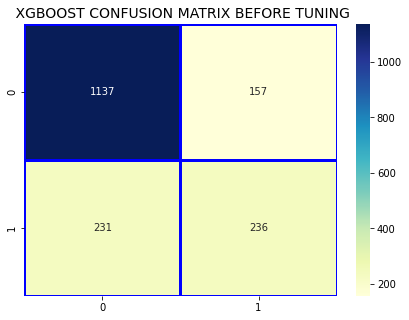

In [226]:
print("before hyper parameter tuning")
print(classification_report(test_y, y_predict))
acc = accuracy_score(test_y, y_predict)
print("the accuracy of the xgboost is = ", round(acc,5)*100, "%")

plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(test_y, y_predict),
                annot=True,fmt = "d",linecolor="b",linewidths=3, cmap= 'YlGnBu')
    
plt.title(" XGBOOST CONFUSION MATRIX BEFORE TUNING",fontsize=14)
plt.show()

after hyper parameter tuning
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1294
           1       0.66      0.51      0.57       467

    accuracy                           0.80      1761
   macro avg       0.75      0.71      0.72      1761
weighted avg       0.79      0.80      0.79      1761

the accuracy of the xgboost is =  80.011 %


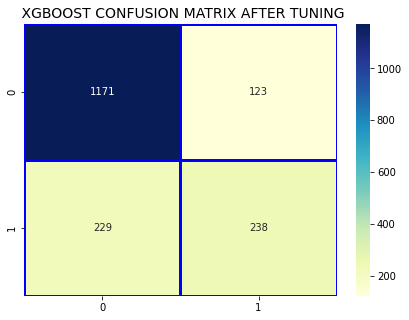

In [227]:
print("after hyper parameter tuning")
print(classification_report(test_y, bayesian_opt_predict))
acc = accuracy_score(test_y, bayesian_opt_predict)
print("the accuracy of the xgboost is = ", round(acc,5)*100, "%")

plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(test_y, bayesian_opt_predict),
                annot=True,fmt = "d",linecolor="b",linewidths=3, cmap= 'YlGnBu')
    
plt.title(" XGBOOST CONFUSION MATRIX AFTER TUNING",fontsize=14)
plt.show()

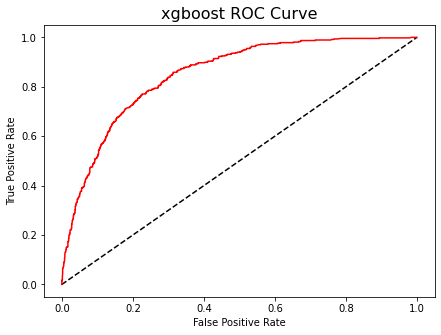

In [228]:
# AUC-ROC CURVE & area under the curve
from sklearn.metrics import roc_curve

y_rfpred_prob = xgboost_bo.predict_proba(test_X)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(test_y, y_rfpred_prob)
plt.figure(figsize=(7,5))
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='xgboost',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('xgboost ROC Curve',fontsize=16)
plt.show();

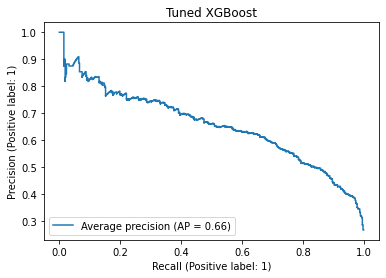

In [229]:
#  Precision-Recall Curve (PR curve)
# the precision-recall curve shows the tradeoff between precision and recalls for different thresholds.

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    xgboost_bo, test_X, test_y, name="Average precision")
_ = display.ax_.set_title("Tuned XGBoost")

In [230]:
# Interpretation & understanding the accuracy variables
"""
Recall score: 0,48 means that in this particular situation we were able to detect 48% of churning customers.
We probably expected more so we need to tune our model. Recall is a very important score in our case.

Avg CV Recall: 0.48 (the same) means that in an average situation we can expect Recall score at about 0,5 (the higher the better).
Our model is probably reliable in terms of bringing recurrent results (the same score). That’s a good news.

Standard Deviation of CV Recall: 0.03 tell us about expected differences with Recall Score (the lower the better).
0.026 is a good result.

ROC-AUC Score: 0.70 tells us that the model is quite efficient at distinguishing between the churn customers and not churn customers.

Accuracy: 0.79 tells us that the number of correct predictions (churn and not churn) made by a model
in relation to the total number of predictions are 79%. Accuracy is not a good score for imbalanced data set.

Precision: 0.65 tells us that when our model predicts a churn customer we have a 67% chance that the prediction is
accurate (we detected a churn customer).

F1 Score: 0.55 tells us how efficient our model is, taking into account both: Recall and Precision scores."""

'\nRecall score: 0,48 means that in this particular situation we were able to detect 48% of churning customers.\nWe probably expected more so we need to tune our model. Recall is a very important score in our case.\n\nAvg CV Recall: 0.48 (the same) means that in an average situation we can expect Recall score at about 0,5 (the higher the better).\nOur model is probably reliable in terms of bringing recurrent results (the same score). That’s a good news.\n\nStandard Deviation of CV Recall: 0.03 tell us about expected differences with Recall Score (the lower the better).\n0.026 is a good result.\n\nROC-AUC Score: 0.70 tells us that the model is quite efficient at distinguishing between the churn customers and not churn customers.\n\nAccuracy: 0.79 tells us that the number of correct predictions (churn and not churn) made by a model\nin relation to the total number of predictions are 79%. Accuracy is not a good score for imbalanced data set.\n\nPrecision: 0.65 tells us that when our model